Jamar_Sanders

Star_classification_Didactic_Space_Chain

DSC_540_Data_Science

Professor_Jonathn_A

# Problem Statement

# Goal: Uncover meaningful relationships between astrophysical features of celestial objects



# Problem Question

 Are there statistically significant co-occurrence patterns between photometric properties (e.g., color indices) and the class of astronomical object?

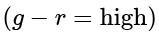

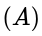

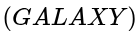,

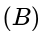,

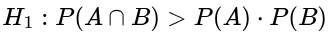,

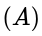,

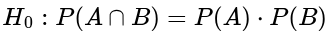







10,000, .1 apriori



![](attachment:image-2.png),
There is no significant association between binned photometric features and object classification.



**Alternative Hypothesis 
There exists at least one meaningful association rule where the observed joint probability is significantly greater than expected under independence.

![image-3.png](attachment:image-3.png),


Where:  
:![image-4.png](attachment:image-4.png),a binned photometric attribute ![image-5.png](attachment:image-5.png),
: ![image-6.png](attachment:image-6.png),object type classification 
![image-7.png](attachment:image-7.png)



Dataset Shape: (10000, 18)
Column Names: ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift', 'plate', 'MJD', 'fiber_ID']
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214 

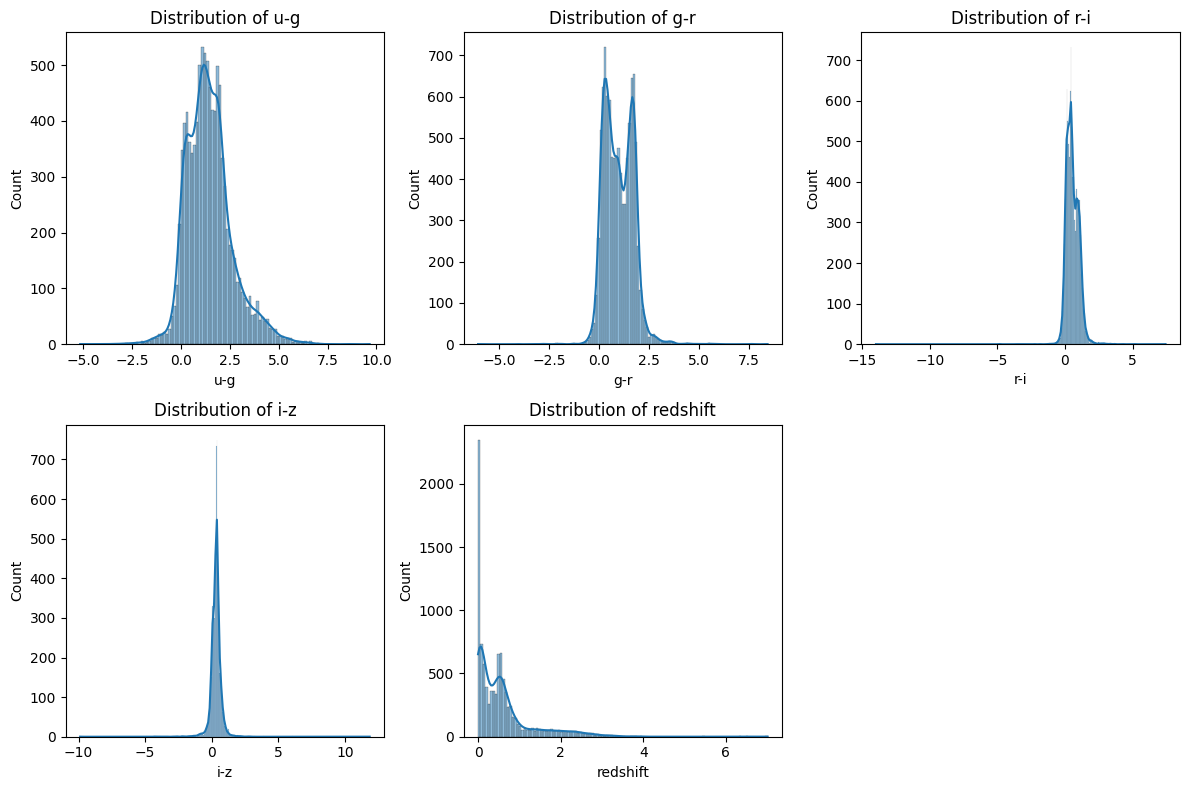

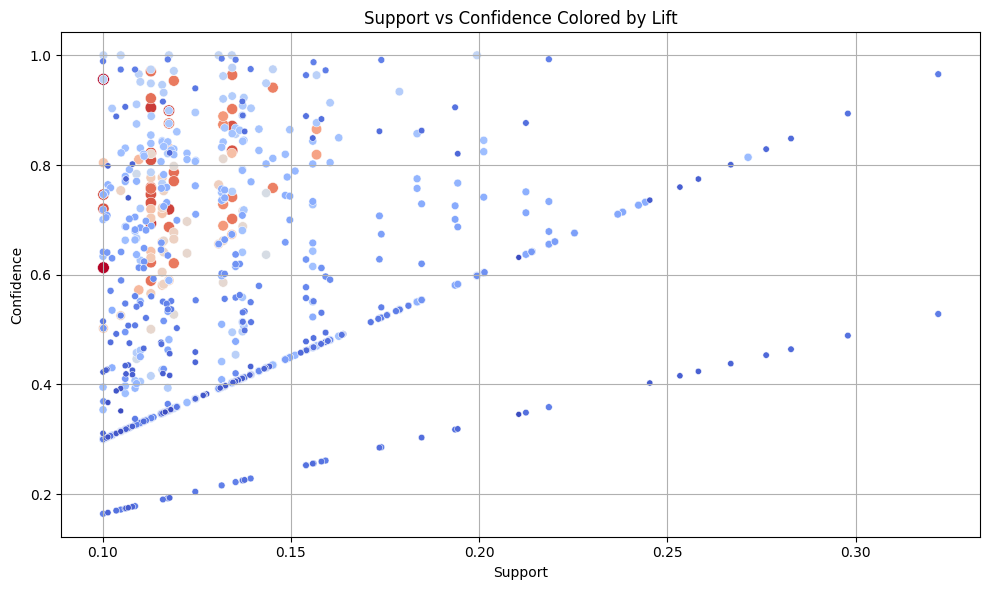

Top Association Rules:

Rule: IF frozenset({'obj_type=STAR', 'g-r_bin=low'}) THEN frozenset({'r-i_bin=low', 'redshift_bin=low'})
Support: 0.100, Confidence: 0.956, Lift: 5.848, Conviction: 19.058

Rule: IF frozenset({'r-i_bin=low', 'redshift_bin=low'}) THEN frozenset({'obj_type=STAR', 'g-r_bin=low'})
Support: 0.100, Confidence: 0.613, Lift: 5.848, Conviction: 2.312

Rule: IF frozenset({'r-i_bin=low', 'u-g_bin=low', 'redshift_bin=high'}) THEN frozenset({'obj_type=QSO', 'g-r_bin=low'})
Support: 0.113, Confidence: 0.905, Lift: 5.560, Conviction: 8.774

Rule: IF frozenset({'obj_type=QSO', 'g-r_bin=low'}) THEN frozenset({'r-i_bin=low', 'u-g_bin=low', 'redshift_bin=high'})
Support: 0.113, Confidence: 0.693, Lift: 5.560, Conviction: 2.854

Rule: IF frozenset({'obj_type=STAR', 'i-z_bin=low'}) THEN frozenset({'r-i_bin=low', 'redshift_bin=low'})
Support: 0.118, Confidence: 0.899, Lift: 5.499, Conviction: 8.289

Rule: IF frozenset({'r-i_bin=low', 'redshift_bin=low'}) THEN frozenset({'obj_type=STA

In [1]:
# Association Rule Mining on SDSS Star Classification Dataset

# Step 1: Problem Statement
# Goal: Uncover meaningful relationships between astrophysical features of celestial objects
# and their classification (e.g., galaxy, star) using the Apriori algorithm.

# Step 2: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Step 3: Load Dataset
# Replace with the correct path to your SDSS dataset

# ...existing code...
df = pd.read_csv('/workspaces/-lkjhg/star_classification.csv', nrows=10000)  # Load only 10,000 rows
# ...existing code...

# Step 4: Initial Exploration
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns.tolist())
print(df.head())

# Step 5: Drop Irrelevant Columns (IDs, coordinates)
drop_cols = ['obj_ID', 'alpha', 'delta', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID',
             'spec_obj_ID', 'plate', 'MJD', 'fiber_ID']
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Step 6: Feature Engineering - Color Indices
df['u-g'] = df['u'] - df['g']
df['g-r'] = df['g'] - df['r']
df['r-i'] = df['r'] - df['i']
df['i-z'] = df['i'] - df['z']

# Step 7: Visualize Distributions
color_indices = ['u-g', 'g-r', 'r-i', 'i-z', 'redshift']
plt.figure(figsize=(12, 8))
for i, col in enumerate(color_indices):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Step 8: Quantile Binning
for col in color_indices:
    df[col + '_bin'] = pd.qcut(df[col], q=3, labels=['low', 'medium', 'high'])

# Step 9: Prepare DataFrame for Association Rule Mining
binned_cols = [col + '_bin' for col in color_indices]
binned_df = df[binned_cols + ['class']].rename(columns={'class': 'obj_type'})

# Step 10: Convert to Transaction Format
transactions = []
for _, row in binned_df.iterrows():
    transaction = [f"{col}={row[col]}" for col in binned_df.columns]
    transactions.append(transaction)

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Step 11: Run Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Step 12: Generate Rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])

# Step 13: Visualize Rules
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', palette='coolwarm', legend=False)
plt.title('Support vs Confidence Colored by Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 14: Interpret and Print Top Rules
print("Top Association Rules:\n")
for _, row in rules.head(10).iterrows():
    print(f"Rule: IF {row['antecedents']} THEN {row['consequents']}")
    print(f"Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f}, Conviction: {row['conviction']:.3f}\n")

# Step 15: Optional - Export Rules
rules.to_csv('association_rules_sdss.csv', index=False)
